### PARRT B 

PSNR (Gaussian filter): 26.31 dB
PSNR (Box filter): 25.80 dB
→ Gaussian filter performs better for additive Gaussian noise.


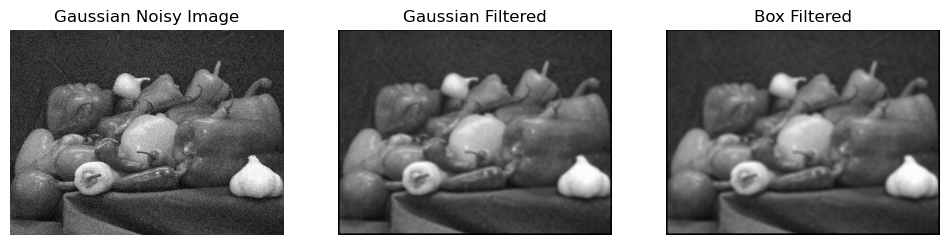

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pi
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load images
clean_img = plt.imread("C:/Users/nickb/Pictures/peppers.png")
noisy_img = plt.imread("C:/Users/nickb/Pictures/gaussian_noise_peppers.png")
sp_noisy_img = plt.imread("C:/Users/nickb/Pictures/saltandpepper_noise_peppers.png")

# Convert to grayscale
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

clean_img = rgb_to_grayscale(clean_img)
noisy_img = rgb_to_grayscale(noisy_img)
sp_noisy_img = rgb_to_grayscale(sp_noisy_img)

# Gaussian Kernel
def gaussian_kernel(size, sigma):
    k = size // 2
    kernel = np.zeros((size, size), dtype=float)
    for i in range(-k, k + 1):
        for j in range(-k, k + 1):
            kernel[i + k, j + k] = (1 / (2 * pi * sigma**2)) * np.exp(-0.5 * ((i**2 + j**2) / (sigma**2)))
    kernel /= np.sum(kernel)
    return kernel

# Box Kernel
def box_kernel(size):
    kernel = np.ones((size, size), dtype=float)
    kernel /= size * size
    return kernel

# Convolution
def apply_filter(image, kernel):
    k = kernel.shape[0] // 2
    h, w = image.shape
    filtered = np.zeros_like(image)
    for i in range(k, h - k):
        for j in range(k, w - k):
            region = image[i - k:i + k + 1, j - k:j + k + 1]
            filtered[i, j] = np.sum(region * kernel)
    return filtered

# Parameters
sigma = 2
size = 7

# Apply filters
gaussian = gaussian_kernel(size, sigma)
gaussian_filtered = apply_filter(noisy_img, gaussian)
box = box_kernel(size)
box_filtered = apply_filter(noisy_img, box)

# Compute PSNR
psnr_gaussian = psnr(clean_img, gaussian_filtered, data_range=clean_img.max() - clean_img.min())
psnr_box = psnr(clean_img, box_filtered, data_range=clean_img.max() - clean_img.min())

print(f"PSNR (Gaussian filter): {psnr_gaussian:.2f} dB")
print(f"PSNR (Box filter): {psnr_box:.2f} dB")

if psnr_gaussian > psnr_box:
    print("→ Gaussian filter performs better for additive Gaussian noise.")
else:
    print("→ Box filter performs better for additive Gaussian noise.")

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Gaussian Noisy Image")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(box_filtered, cmap='gray')
plt.title("Box Filtered")
plt.axis('off')
plt.show()

**Define Filters**  
   - **Gaussian Kernel**: weights decrease with distance from center using  
     `exp(-0.5*(i^2 + j^2)/sigma^2)/(2*pi*sigma^2)`  
     Normalized to sum = 1.  
   - **Box Kernel**: all weights equal, simple averaging.

**Convolution Function**  
   - Loops over each pixel (excluding edges).  
   - Extracts a local neighborhood and multiplies by the kernel.  
   - Sums values to produce the filtered pixel.  
   - This replaces built-in filtering functions.

**Observation:** Gaussian filter reduces noise more effectively while preserving edges; Box filter oversmooths.
Gaussian filter visually and quantitatively outperforms Box filter for Gaussian noise.

PSNR (Gaussian filter on Salt & Pepper noise): 26.11 dB
PSNR (Median filter): 27.07 dB
→ Median filter performs better for salt-and-pepper noise.


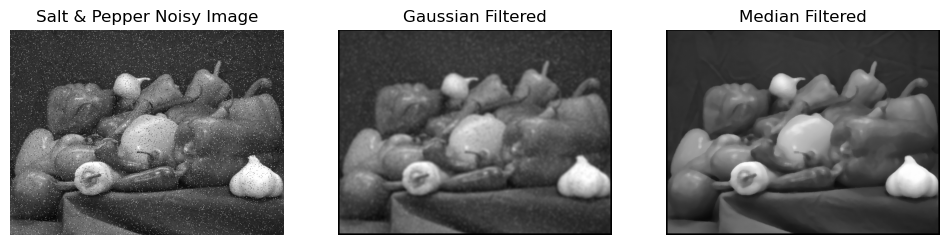

In [9]:
#  Median Filter
def median_filter(image, size):
    k = size // 2
    h, w = image.shape
    filtered = np.zeros_like(image)

    for i in range(k, h - k):
        for j in range(k, w - k):
            neighbors = []
            for m in range(-k, k + 1):
                for n in range(-k, k + 1):
                    neighbors.append(image[i + m, j + n])
            neighbors.sort()
            median_val = neighbors[len(neighbors) // 2]
            filtered[i, j] = median_val

    return filtered

gaussian_filtered_sp = apply_filter(sp_noisy_img, gaussian)
median_filtered_sp = median_filter(sp_noisy_img, size)

#  Compare PSNRs
psnr_gaussian_sp = psnr(clean_img, gaussian_filtered_sp)
psnr_median_sp = psnr(clean_img, median_filtered_sp)

print(f"PSNR (Gaussian filter on Salt & Pepper noise): {psnr_gaussian_sp:.2f} dB")
print(f"PSNR (Median filter): {psnr_median_sp:.2f} dB")

if psnr_median_sp > psnr_gaussian_sp:
    print("→ Median filter performs better for salt-and-pepper noise.")
else:
    print("→ Gaussian filter performs better for salt-and-pepper noise.")

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(sp_noisy_img, cmap='gray')
plt.title("Salt & Pepper Noisy Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(gaussian_filtered_sp, cmap='gray')
plt.title("Gaussian Filtered")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(median_filtered_sp, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')
plt.show()

. **Median Filter Function**  
   - For each pixel, a local neighborhood of size `size × size` is extracted.  
   - Neighboring pixel values are collected, sorted, and the median is assigned to the current pixel.  
   - This preserves edges better than averaging filters and removes extreme noise spikes.

**Observation:**  
- Median filter outperforms Gaussian filter for salt-and-pepper noise because it removes extreme values without blurring edges.  
- Gaussian filter smooths the image but cannot fully remove sharp noise spikes.


Median filtering produces a cleaner image while preserving details, confirming its suitability for impulsive noise.